|<img style="float:left;" src="http://pierreproulx.espaceweb.usherbrooke.ca/images/usherb_transp.gif"> |Pierre Proulx, ing, professeur|
|:---|:---|
|Département de génie chimique et de génie biotechnologique |** GCH200-Phénomènes d'échanges I **|


### Section 6.2, exemple 6.2-2

##### Dans cet exemple on traite de facon légèrement différente car on suppose une conduite lisse. Ceci explique que le débit soit plus élevé. 


In [6]:
#
# Pierre Proulx
#
# Préparation de l'affichage et des outils de calcul symbolique
#
import sympy as sp
from IPython.display import *
sp.init_printing(use_latex=True)

In [7]:
# Paramètres, variables et fonctions
rho,L,dP,D,v_z,mu=sp.symbols('rho,L,dP,D,v_z,mu')                                                            

In [8]:
f=1/4*(D/L)*(dP/(1/2*rho*v_z**2))            # equation définissant le facteur f
Re=rho*v_z*D/mu                           
f_L=16/Re                                # f calculé si Re<2100
f_T=0.0791/Re**0.25                      # si Re > 2100

 Re estimé = 17661544.2470117
 Pas laminaire, on calcule en turbulent


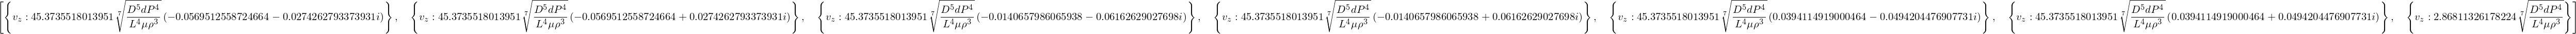

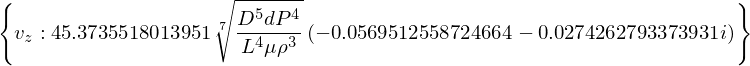

 le Reynolds calculé avec Blasius pour conduite lisse


' Débit massique calculé en kg/sec'

In [9]:
# Dictionnaire contenant les valeurs des paramètres
dico={'rho':1000,'D':7.981*2.54/100,'mu':0.001,'dP':3/14.7*101325,'L':1000*0.3048}
#
# a priori on ne sait pas si c'est laminaire ou pas,
# donc en premier on teste laminaire
#
eqL=sp.Eq(f-f_L)
v1=sp.solve((eqL,0),v_z)
Re1=Re.subs(v1)
Re1=Re1.subs(dico).evalf()
if Re1 > 2100:
    print(' Re estimé =',Re1)
    print(' Pas laminaire, on calcule en turbulent')
    eqT=sp.Eq(f-f_T)
    v2=sp.solve((eqT,0),v_z,dict=True)    # 
    display(v2)
    v2=v2[0]                              # il y aura plusieurs racines
    display(v2)                           #  la première racine
    Re2=Re.subs(v2)                       #  est justement réelle
    Re2=Re2.subs(dico)
    print(' le Reynolds calculé avec Blasius pour conduite lisse')
    display(Re2.evalf())
    display(' Débit massique calculé en kg/sec')
    V=((v_z.subs(v2)).subs(dico)).evalf()        # evalf() car le résultat est symbolique
    W=rho*sp.pi*D**2/4*V                         # et on le veut en format numérique,
    display(W.subs(dico).evalf())                # c'est similaire à Matlab.
else:
    print(' le Reynolds calculé laminaire pour conduite lisse')
    display(Re1)
    V=((v_z.subs(v1)).subs(dico)).evalf()        
    W=rho*sp.pi*D**2/4*V
    display(' Débit massique calculé en kg/sec')
    display(W.subs(dico).evalf())                